### 0. [準備]必要なライブラリをインポートする

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
from sympy.physics.quantum.gate import IdentityGate as _I

↓SymPy で良い感じに表示するためのおまじない

In [2]:
from sympy.printing.dot import dotprint
init_printing()

###  １. 計算に必要な量子ビット（量子レジスタ）を準備して、その値を初期化する

計算に必要な量子ビットは、sympy.physics.quantum.qubit.Qubitクラス（実態はケット・ベクトル）を必要なビット数を
初期化して作成します。

* 例１：変数 $a$ に、２量子ビット $ \vert 00 \rangle $ を準備します。

In [3]:
a = Qubit('00')
print(a)
a

|00>


* 例２：変数 $ a $ の状態ベクトルをつかって、変数 $ b $ を同じ状態ベクトルとして準備します。

In [4]:
b = Qubit(a)
print(b)
b

|00>


* 例３：8量子ビットをすべて $0$ として準備します。

In [5]:
q_8 = Qubit('0'*8)
pprint(q_8)
q_8

❘00000000⟩


* 例４：（後述で説明する計算方法を使いますが）計算を行って、変数 $c$ の状態ベクトルを準備します。  
  　　　２量子ビットの重ね合わせ

|00>/2 + |01>/2 + |10>/2 + |11>/2


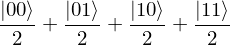

In [6]:
c = qapply(H(1)*H(0)*a)
print(c)

c

Qubitクラスには次のような関数やプロパティが定義されています。

In [7]:
q = Qubit('000')

# サイズ（量子ビット数）を返す
print("nqubits=%d"% q.nqubits)
print("len=%d" % len(q))
print("dimension=%d" % q.dimension)
print(q.qubit_values)

q.flip(1)  # 引数で指定された位置(*)の右から2番目の量子ビットを反転します.

nqubits=3
len=3
dimension=3
(0, 0, 0)


### 2. 量子計算をユニタリ行列（ゲート演算子）で記述する

作用させるユニタリ行列を標準で準備されているユニタリ行列のテンソル積で表します。

まず最初に、標準で定義されているユニタリ行列を見て見ましょう。

#### １量子ビット操作
引数に渡す数字は、作用させる量子ビットの位置を表します。

* パウリ演算子

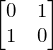

In [8]:
X(0).get_target_matrix() # σ_x, get_target_matrix() で行列表現を取り出します

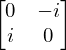

In [9]:
Y(0).get_target_matrix() # σ_y

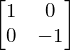

In [10]:
Z(0).get_target_matrix()  # σ_z

* アダマール（Hadamard）変換

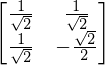

In [11]:
H(0).get_target_matrix()

* $ S, S^{\dagger}, T, T^{\dagger} $ 変換

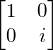

In [12]:
S(0).get_target_matrix()

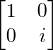

In [13]:
represent(S(0), nqubits=1) # represent は、行列を nqubits で表現します。

In [14]:
Dagger(S(0))

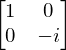

In [15]:
Dagger(S(0).get_target_matrix())  # get_target_matrix() はDaggerカッコの中

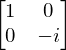

In [16]:
represent(Dagger(S(0)), nqubits=1)

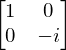

In [17]:
def Sdg(n): return S(n)**(-1)   # S^{\dagger} としては、この演算子を使います。
represent(Sdg(0),nqubits=1)

In [18]:
T(0)

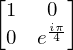

In [19]:
represent(T(0),nqubits=1)

In [20]:
Dagger(T(0))

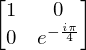

In [21]:
represent(Dagger(T(0)),nqubits=1)  

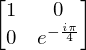

In [22]:
Dagger(T().get_target_matrix())  # get_target_matrix() はDaggerカッコの中

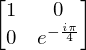

In [23]:
def Tdg(n): return T(n)**(-1)   # T^{\dagger} としては、この演算子を使います。
represent(Tdg(0),nqubits=1)

#### ２量子ビット操作
引数に渡す数字は２つ、作用させる量子ビットの位置を表します。省略すると 0 のみとなるため、そのあとの計算がうまくできません。  
必ず、引数を指定するようにしましょう。


* CNOT操作  
次の $ 4 \times 4 $ の行列です。 get_target_matrix() では表示できません。represent() を使います。  

$ \left( \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{array} \right) $

controls=(1,),targets=(0,),gate=X(0)


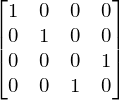

In [24]:
CX=CNOT(1,0)
print("controls=%s,targets=%s,gate=%s" % (CX.controls, CX.targets, CX.gate))  # CNOTのプロパティ
# CX.get_target_matrix() は、XGate になってしまいます。
# pprint(CX.get_target_matrix())
represent(CX,nqubits=2) # 行列形式で直接表現する方法

* SWAP操作
  
指定された量子ビットを入れ替える操作です。

⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  0  1⎦


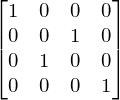

In [25]:
pprint(SWAP(0,1).get_target_matrix())
represent(SWAP(0,1),nqubits=2) # 行列形式で直接表現する方法

* CPHASE操作  
  
制御Zゲート、Control-Z、CZ と呼ばれ、次の行列です。
  
$ \left( \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{array} \right) $

In [26]:
CPHASE(0,1)

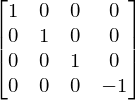

In [27]:
represent(CPHASE(0,1),nqubits=2)

次に、テンソル積をいくつか試してみます。  


In [28]:
Op1 = X(1)*_I(0)
pprint(TensorProduct(X().get_target_matrix(),_I().get_target_matrix())) # Op1 を行列形式で直接プリントできる方法があるかも？なかったら作ります
Op1

⎡0  0  1  0⎤
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎣0  1  0  0⎦


In [29]:
# 標準の１量子ビット操作のユニタリ演算は、その掛け算の順番よりも、指定した量子ビット（引数）がポイントとなります。
# 順番が大切になるのは、同じ位置の量子ビットに作用する場合で、積の交換はできません。
Op1_ = _I(0)*X(1)
Op1_

In [30]:
Op2 = _I(1)*X(0)
pprint(TensorProduct(_I().get_target_matrix(),X().get_target_matrix())) # Op2 を行列形式で直接プリントできる方法があるかも？なかったら作ります
Op2

⎡0  1  0  0⎤
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  1  0⎦


（余談）テンソル積の計算構造をツリー構造で表示できます。

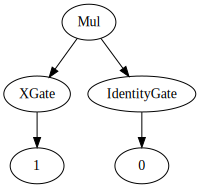

In [34]:
# !pip install graphviz
from sympy.printing.dot import dotprint
from graphviz import Source
Source(dotprint(Op1)) # Jupyter NotebookやQtConsoleでは、ツリー構造が表示できます。

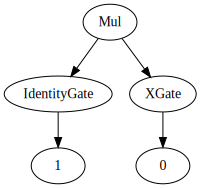

In [35]:
Source(dotprint(Op2))  # 内部的な構造のため、通常の量子計算では不要です。

* Walsh–Hadamard 変換（8量子ビット）

In [36]:
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s):
       h = H(i)*h
    return h

h_8 = hadamard(0,8)
print(h_8)
print("\n")
pprint(h_8)    # = pretty_print(h_8)
# h8.get_target_matrix() は実装がなく、エラーになります
h_8

H(7)*H(6)*H(5)*H(4)*H(3)*H(2)*H(1)*H(0)


H ⋅H ⋅H ⋅H ⋅H ⋅H ⋅H ⋅H 
 7  6  5  4  3  2  1  0


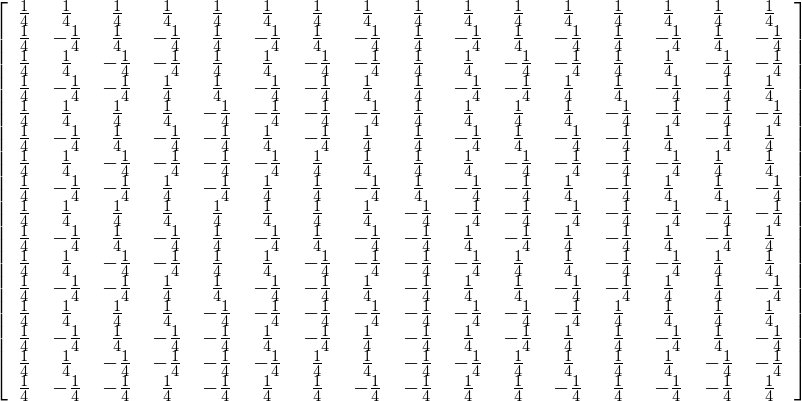

In [37]:
h_4 = hadamard(0,4)
represent(h_4,nqubits=4)

#### 量子回路図

ユニタリ行列のテンソル積は、量子回路として、量子回路図で表現できます。  
SymPy には、量子回路図を描画するための仕組みが備わっています。量子回路図を描いてみましょう。

In [38]:
# そのために、まずは、必要なライブラリを読み込んで準備します。
%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate

CNOTゲートを描いてみましょう。

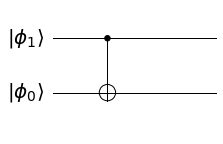

In [39]:
CircuitPlot(CNOT(1,0), 2, labels=labeller(2,'\phi')[::-1])  # labellerでつくられる添え字の上下が逆？

†（ダガー）付きのゲート演算子など、ゲートの自作もできます。

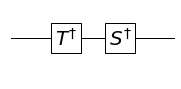

In [40]:
Sdag = CreateOneQubitGate('Sdg','S^{\dagger}')
Tdag = CreateOneQubitGate('Tdg','T^{\dagger}')
CircuitPlot(Sdag(0)*Tdag(0),nqubits=1)

ある回路を描いてみましょう。  
テンソル積は、右から順番に量子ビットに作用します。一方、ゲート回路図は左から順番になります。操作の順番に注意してください。

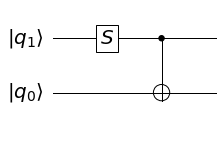

In [41]:
CircuitPlot(CNOT(1,0)*S(1), 2, labels=labeller(2)[::-1])  # 操作の順番に注意してください。

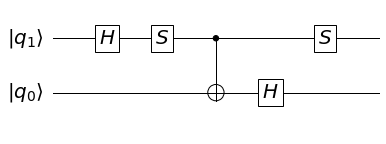

In [42]:
CircuitPlot(S(1)*H(0)*CNOT(1,0)*S(1)*H(1), 2, labels=labeller(2)[::-1])  

（参考）Z基底での測定を描くときは、Mz を使って表現します。

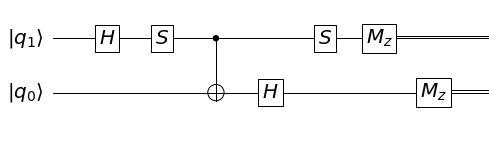

In [43]:
CircuitPlot(Mz(0)*Mz(1)*S(1)*H(0)*CNOT(1,0)*S(1)*H(1), 2, labels=labeller(2)[::-1])  

### 3. ユニタリ行列を量子ビットに作用する
ここまでのユニタリ行列の準備では、実際の行列計算は行われておりません。  
SymPy の特徴である「変数を変数のまま」扱ってきました。変数は単なる記号でしかありませんでした。

実際に変数を計算するのは、 qapply() という関数で行います。計算したい記述を qapply 関数の引数に指定して計算します。

直前で回路図を描いた計算をしてみましょう。

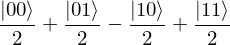

In [44]:
qapply(S(1)*H(0)*CNOT(1,0)*S(1)*H(1)*Qubit('00'))

次の例は、少し計算時間がかかります。８量子ビットの重ね合わせ状態を作ります。（計算して作成します）

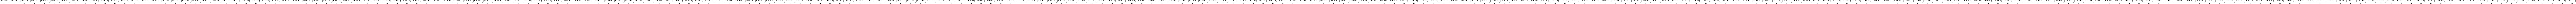

In [45]:
hadamard_8=qapply(h_8*q_8)
hadamard_8

### 4. 測定する

ここまでの量子計算（qapply）では、量子状態のまま計算されます。  
シミュレーション上の理論的な計算では、qapplyまで行えば、目的が達成することが多いです。  


SymPy には、観測のためのメソッドも備わっています。  
measure_all()では、引数で渡された量子ビットのすべての状態の測定確率を計算で求めて出力します。  

そのほかにも幾つか観測のためのメソッドが提供されます。例えば、measure_partial()は、第一引数で指定された量子ビットに対して、第二引数で指定された部分的な振幅の測定を実行します。

In [47]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot

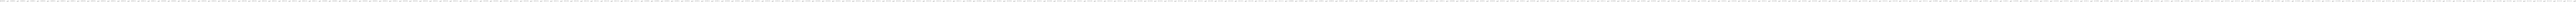

In [48]:
measure_all(hadamard_8)

In [49]:
for i in range(8):
    pprint(measure_all_oneshot(hadamard_8))

❘10100100⟩
❘01101101⟩
❘01010011⟩
❘10010000⟩
❘01110000⟩
❘11001100⟩
❘10110011⟩
❘00100001⟩


## （例題１）Toffoli（CCX）, CCCX, CCCCX ...

In [50]:
from sympy.physics.quantum.gate import CGateS

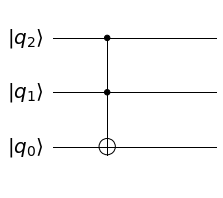

In [51]:
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def Toffoli(c1,c2,t):  return CGateS((c1,c2),X(t))
CircuitPlot(CCX(1,2,0),3,labels=labeller(3)[::-1])

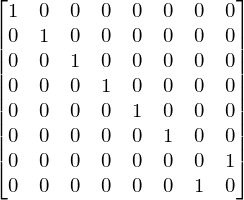

In [52]:
represent(CCX(1,2,0),nqubits=3)

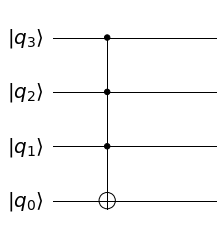

In [53]:
def CCCX(c1,c2,c3,t): return CGateS((c1,c2,c3),X(t))
CircuitPlot(CCCX(1,2,3,0),4,labels=labeller(4)[::-1])

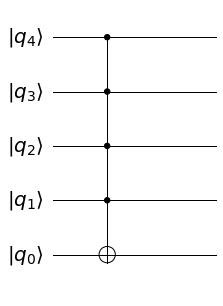

In [54]:
def CCCCX(c1,c2,c3,c4,t): return CGateS((c1,c2,c3,c4),X(t))
CircuitPlot(CCCCX(1,2,3,4,0),5,labels=labeller(5)[::-1])

## （例題２）重ね合わせ状態の中の、ある状態のみマーキングする

重ね合わせ状態の中の、ある状態 $ s_t $ のみに、−１掛ける操作（ここでは、マーキングを呼びます）を考えます。  
  
たとえば、２量子ビットの重ね合わせ状態 $\displaystyle \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ +\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ を考えるとき、  
状態 $\;|\ 10\ \rangle\;$ をマーキングするとします。   
  
マーキング後の状態は、$\displaystyle  \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ -\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ となることを目指します。

### ３量子ビットのマーキング操作を試してみましょう

In [55]:
h_3 = hadamard(0,3)
target_state_3 = qapply(h_3*Qubit('000'))          #３量子ビットの重ね合わせ状態を準備します。
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # ＣＣＺ演算子を定義します。

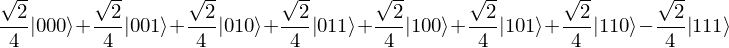

In [56]:
mark_7 = CCZ(1,2,0)
qapply(mark_7*target_state_3)

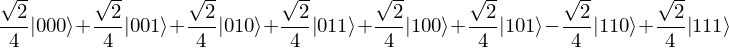

In [57]:
mark_6 = X(0)*CCZ(1,2,0)*X(0)
qapply(mark_6*target_state_3)

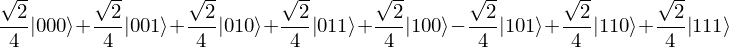

In [58]:
mark_5 = X(1)*CCZ(1,2,0)*X(1)
qapply(mark_5*target_state_3)

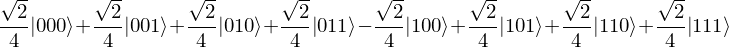

In [59]:
mark_4 = X(1)*X(0)*CCZ(1,2,0)*X(1)*X(0)
qapply(mark_4*target_state_3)

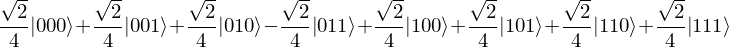

In [60]:
mark_3 = X(2)*CCZ(1,2,0)*X(2)
qapply(mark_3*target_state_3)

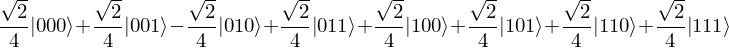

In [61]:
mark_2 = X(2)*X(0)*CCZ(1,2,0)*X(2)*X(0)
qapply(mark_2*target_state_3)

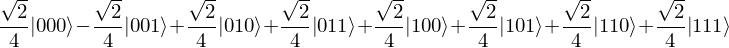

In [62]:
mark_1 = X(2)*X(1)*CCZ(1,2,0)*X(2)*X(1)
qapply(mark_1*target_state_3)

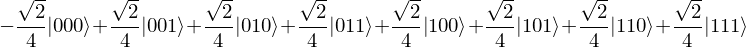

In [63]:
mark_0 = X(2)*X(1)*X(0)*CCZ(1,2,0)*X(2)*X(1)*X(0)
qapply(mark_0*h_3*Qubit('000'))

## （例題３）重ね合わせ状態の中に、マーキングした状態があるかを見る
  
著名な操作「Grover のアルゴリズム」を試してみましょう。  

（ヒント１）平均値周りの反転操作：$\displaystyle D_{n} = H_{n} \cdot \Big( 2\ |\ 0\ \rangle\langle\ 0\ |_{n}\ -\ I_{n} \Big) \cdot H_{n} $ を使います。  
  
（ヒント２）試行回数は、$\displaystyle \mathcal{O}(\sqrt{n}) $ 


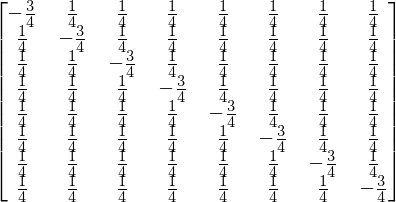

In [64]:
# d_3 = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3    # グローバル位相（絶対位相）の差に注意
# d_3 = h_3 * X(0)*X(1)*X(2) * CGateS((1,2), Z(0)) * X(0)*X(1)*X(2) * h_3
def DOp(n): return (Qubit('0'*n)*QubitBra('0'*n)*2-_I(0))     # ゲート操作で計算するには、上記コメントのような演算になります。
d_3 = h_3 * DOp(3) * h_3    # 平均値周りの反転操作
represent(d_3,nqubits=3)

### ３量子ビットで状態｜７＞を探す

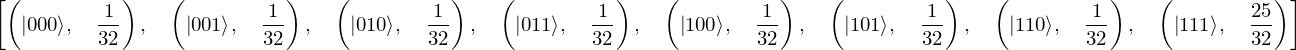

In [65]:
ret1=qapply(d_3*mark_7*target_state_3)
measure_all(ret1)

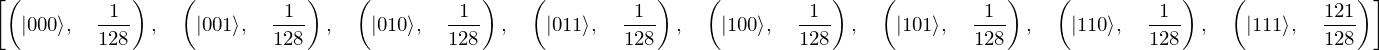

In [66]:
ret2=qapply(d_3*mark_7*ret1)  # シミュレーター計算ですから、上で一度観測した ret1 を使っても観測の影響なく次の計算に利用可能。
measure_all(ret2)

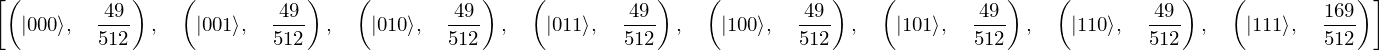

In [67]:
over_1=qapply(d_3*mark_7*ret2)  # 試行回数が多いとどうなるでしょう。
measure_all(over_1)

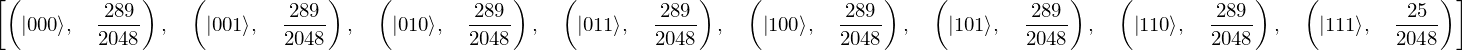

In [68]:
over_2=qapply(d_3*mark_7*over_1)  # 試行回数が多いとどうなるでしょう。
measure_all(over_2)

通しで計算すると、回路が長くなってきています。少し時間かかります。

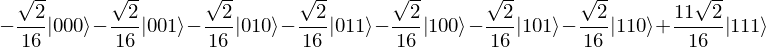

In [69]:
from sympy.physics.quantum.gate import gate_simp
search_7_in_3qubit = gate_simp(d_3*mark_7*d_3*mark_7)
ret3=qapply(search_7_in_3qubit*target_state_3)
ret3

In [76]:
print(measure_all(ret3))
for i in range(10):
    pprint(measure_all_oneshot(ret3))

[(|000>, 1/128), (|001>, 1/128), (|010>, 1/128), (|011>, 1/128), (|100>, 1/128), (|101>, 1/128), (|110>, 1/128), (|111>, 121/128)]
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩


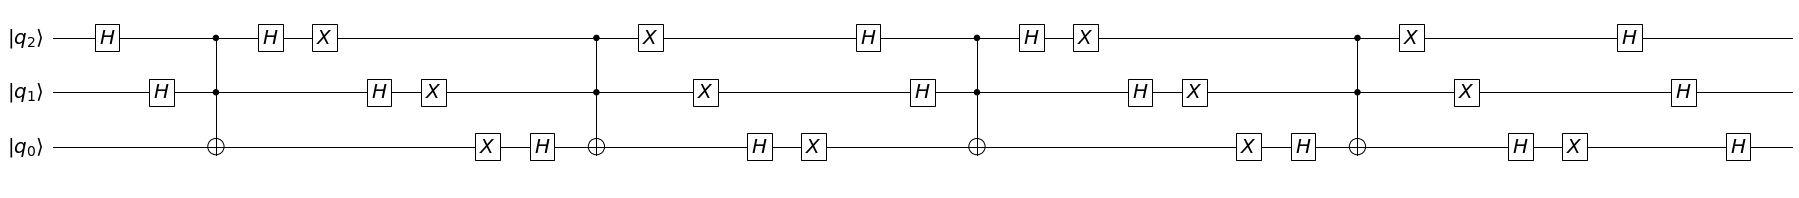

In [77]:
d_3_gate = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3
CircuitPlot(gate_simp(d_3_gate*mark_7*d_3_gate*mark_7*h_3),nqubits=3,labels=labeller(3)[::-1])

## OpenQL 発のPythonライブラリ QuantPy を紹介します
  
QuantPy は、フロントエンドを SymPy を使っています。  
「量子ビットの準備」「量子操作（ゲート演算子）の記述」は SymPy で行います。  
「量子ビットにゲート演算子を作用」する qapply() を置き換えて動作します。  


In [78]:
from quantpy.sympy.qapply import qapply  
# sympy.physics.quantum.qapply を上書きします。sympy.physics.quantum のインポートの後に読み込んでください。

In [79]:
from quantpy.sympy.executor.classical_simulation_executor import ClassicalSimulationExecutor
classical_simulator = ClassicalSimulationExecutor()
for i in range(8):
    print(qapply(H(2)*H(1)*H(0)*Qubit('000'), executor=classical_simulator))

(1+0j)|010>
(1+0j)|010>
(1+0j)|110>
(1+0j)|001>
(1+0j)|001>
(1+0j)|101>
(1+0j)|010>
(1+0j)|010>


In [80]:
from quantpy.sympy.executor.ibmq_executor import IBMQExecutor
# APItoken = 'hogehoge'
# ibmq_simulator = IBMQExecutor(api_key=APItoken, backend='ibmqx2')
ibmq_simulator = IBMQExecutor(backend='local_qasm_simulator')
qpy_ret=qapply(H(2)*H(1)*H(0)*Qubit('000'), executor=ibmq_simulator)
print(qpy_ret)

{'100': 150, '111': 108, '001': 133, '000': 129, '101': 125, '011': 131, '010': 124, '110': 124}


In [81]:
from quantpy.sympy.expr_extension import *
sympy_expr_add_operators()
circuit = X(0)>>X(1)>>X(2)
circuit

## （Homework）Toffoli 再び

### 課題１）　Toffoli ゲートを、基本的な量子ゲートだけで表してください。

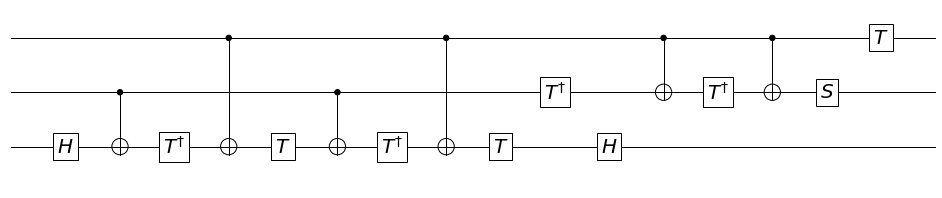

In [82]:
def ToffoliGate_plot(q0,q1,q2):
    return T(q0)*S(q1)*CNOT(q0,q1)*Tdag(q1)*CNOT(q0,q1)\
            *H(q2)*Tdag(q1)*T(q2)*CNOT(q0,q2)*Tdag(q2)*CNOT(q1,q2)\
            *T(q2)*CNOT(q0,q2)*Tdag(q2)*CNOT(q1,q2)*H(q2)
CircuitPlot(ToffoliGate_plot(2,1,0), nqubits=3)

In [83]:
def Tdg(q): return (T(q)**(-1))
def ToffoliGate(q0,q1,q2):
    return T(q0)*S(q1)*CNOT(q0,q1)*Tdg(q1)*CNOT(q0,q1)\
            *H(q2)*Tdg(q1)*T(q2)*CNOT(q0,q2)*Tdg(q2)*CNOT(q1,q2)\
            *T(q2)*CNOT(q0,q2)*Tdg(q2)*CNOT(q1,q2)*H(q2)
ToffoliGate(2,1,0)
# qapply(ToffoliGate(2,1,0)*Qubit('110'), dagger=True)   # 残念ながら、計算ができませんでした。

### 課題２）　CCCX ゲートを、 Toffoli ゲートと CNOT ゲートで表してください。

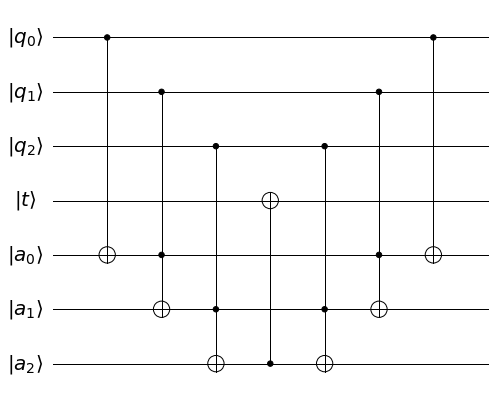

In [84]:
def CCCX_with_ancilla(q0,q1,q2,t,a0,a1,a2): 
    return CNOT(q0,a0)*Toffoli(q1,a0,a1)*Toffoli(q2,a1,a2)*CNOT(a2,t)*Toffoli(q2,a1,a2)*Toffoli(q1,a0,a1)*CNOT(q0,a0)
CircuitPlot(CCCX_with_ancilla(6,5,4,3,2,1,0),nqubits=7,labels=(labeller(3,'a')+['t']+labeller(3,)))

In [85]:
qapply(CCCX_with_ancilla(6,5,4,3,2,1,0)*Qubit('1111000'))

In [86]:
qapply(CCCX_with_ancilla(6,5,4,3,2,1,0)*Qubit('1110000'))

### 付録Ａ：ブラ・ベクトル
複素共役を表すための dagger（ $ \dagger $ ） をQubitオプジェクトに作用させると、ブラ・ベクトルになります。  
また、内積も計算できます。  
シンボルのままで内積にするには、単にブラ・ベクトル QubitBra とケット・ベクトル Qubit を掛ける（*）だけです。  
実際の値を計算するには、この内積オブジェクトのdoit()メソッドで計算します。

In [87]:
from sympy.physics.quantum.dagger import Dagger
Dagger(q)

In [88]:
type(Dagger(q))

sympy.physics.quantum.qubit.QubitBra

In [89]:
ip = Dagger(q)*q
ip

In [90]:
ip.doit()

### 付録Ｂ：量子フーリエ変換

In [91]:
from sympy.physics.quantum.qft import QFT
fourier_3 = QFT(0,3).decompose()
fourier_3

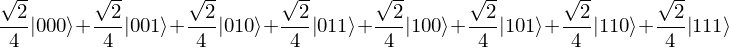

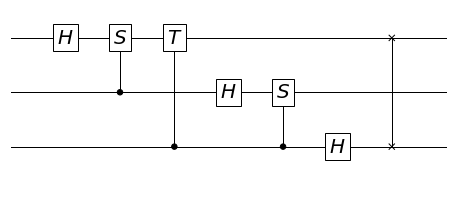

In [92]:
figure_qft3 = CircuitPlot(fourier_3, nqubits=3)
qapply(fourier_3 * Qubit('000'))

### 付録Ｃ：QASM
  
SymPy独自のQASMでゲートを記述できます。  
ただし、OpenQASM とは異なるフォーマットです。注意してください。

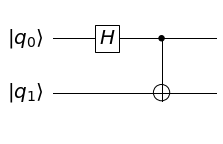

In [93]:
from sympy.physics.quantum.qasm import Qasm
qprog1 = Qasm(
    'qubit q0',
    'qubit q1',
    'h q0',
    'cnot q0,q1')
CircuitPlot(qprog1.get_circuit(),2,labels=labeller(2))

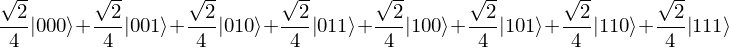

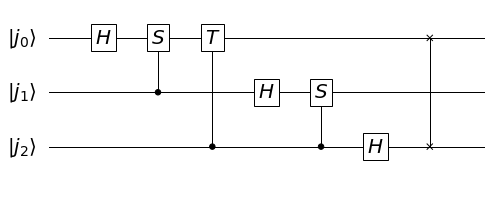

In [94]:
qprog2 = Qasm("def	c-S,1,'S'",
        "def	c-T,1,'T'",
        "qubit	j_0",
        "qubit	j_1",
        "qubit	j_2",
        "h	j_0",
        "c-S	j_1,j_0",
        "c-T	j_2,j_0",
        "nop	j_1",
        "h	j_1",
        "c-S	j_2,j_1",
        "h	j_2",
        "swap	j_0,j_2")
qprog2.plot()
qapply(qprog2.get_circuit()*Qubit('000'))

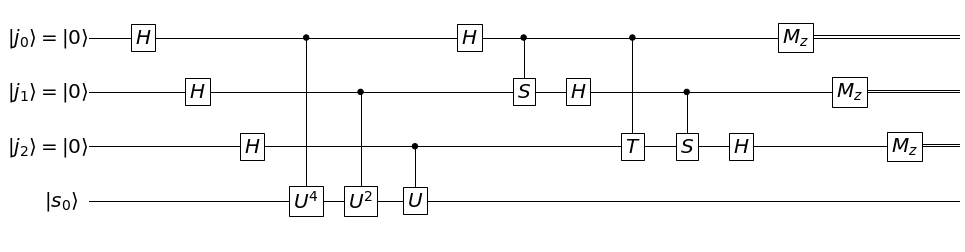

In [95]:
qasm_lines = """\
	def	CU,1,'U'
	def	CU2,1,'U^2'
	def	CU4,1,'U^4'
	def	c-S,1,'S'
	def	c-T,1,'T'
	qubit	j_0,0	# QFT qubits
	qubit	j_1,0
	qubit	j_2,0
	qubit	s_0	# U qubits
	h	j_0	# equal superposition
	h	j_1
	h	j_2
	CU4	j_0,s_0	# controlled-U
	CU2	j_1,s_0
	CU	j_2,s_0
	h	j_0	# QFT
	c-S	j_0,j_1
	h	j_1
	nop	j_0
	c-T	j_0,j_2
	c-S	j_1,j_2
	h	j_2
	nop	j_0
	nop	j_0
	nop	j_1
	measure	j_0	# final measurement
	measure	j_1	
	measure	j_2"""

qprog3 = Qasm(*qasm_lines.splitlines())
qprog3.plot()